<a href="https://colab.research.google.com/github/UGA201/AI_project/blob/main/n221a_decision_trees_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 2 / NOTE 1*

# 📝 Assignment
---

# Decision Trees(결정트리)

## 캐글 인클래스(InClass) Competitions



### 1) EDA를 수행합시다

- [캐글 계정을 만드세요](https://www.kaggle.com/), 공유된 인클래스 대회 url을 통해 이동한 후 대회에 참여하세요.
- H1N1 데이터를 훈련/검증/테스트 셋으로 나누어 준비하세요
- 분류기의 기준모델을 설정하세요.
- profiling을 사용하여 데이터를 살펴보고, missing value, zeros, cardinarity 등을 확인하여 처리하세요.
- 본인만의 특성공학을 수행하세요.


In [ ]:
# !pip install graphviz

In [ ]:
import sys
if 'google.colab' in sys.modules:
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*
    !pip install plotly==4.*

     |████████████████████████████████| 81kB 2.7MB/s 
     |████████████████████████████████| 245kB 2.8MB/s 
     |████████████████████████████████| 81kB 9.5MB/s 
     |████████████████████████████████| 3.1MB 39.1MB/s 
     |████████████████████████████████| 81kB 9.9MB/s 
     |████████████████████████████████| 61kB 8.4MB/s 
     |████████████████████████████████| 604kB 38.2MB/s 
     |████████████████████████████████| 296kB 41.5MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=575f251b962da822c92046b6f4675722d1d71e41f919fd90e77c58aea06fb6ff
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for phik: filename=phik-0.11.0-cp36-none-any.whl size=599738 sha256=e9ce3ade4cf7045020607c69dbb00824ee44a317e8d64215b5e21e42aec1e79a
  Stored in directory: /root/.cache/pip/wheels/af/54/11/aba77f21075918de02f7964eabfe8c10d5542df9e6ad10b225
Successfully built htmlmin phik
ERROR: googl

In [ ]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [ ]:
# 한글 깨짐 수정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import matplotlib.pyplot as plt
plt.rc("font", family='NanumBarunGothic')
# 마이너스 사인 수정
plt.rc('axes', unicode_minus=False)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
target = 'vacc_h1n1_f'
train = pd.merge(pd.read_csv('train.csv'),pd.read_csv('train_labels.csv')[target], left_index=True, right_index=True)
test = pd.read_csv('test.csv')

In [ ]:
train.head().T

,0,1,2,3,4
h1n1_concern,NaN,3,2,2,1
h1n1_knowledge,NaN,1,1,2,2
behavioral_antiviral_meds,NaN,0,0,1,0
behavioral_avoidance,NaN,0,1,1,1
behavioral_face_mask,NaN,0,0,0,0
behavioral_wash_hands,NaN,1,1,1,1
behavioral_large_gatherings,NaN,0,1,0,0
behavioral_outside_home,NaN,0,0,0,0
behavioral_touch_face,NaN,1,1,0,1
doctor_recc_h1n1,0,0,0,0,0


In [ ]:
train.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_insurance               float64
health_worker                  float64
opinion_h1n1_vacc_effective     object
opinion_h1n1_risk               object
opinion_h1n1_sick_from_vacc     object
opinion_seas_vacc_effective     object
opinion_seas_risk               object
opinion_seas_sick_from_vacc     object
agegrp                          object
education_comp                 float64
raceeth4_i                       int64
sex_i                            int64
inc_pov                  

#### 훈련데이터셋을 훈련, 검증 데이터셋으로 나누기
- 훈련데이터셋을 훈련, 검증데이터셋으로 나눈다. 이 때 비율은 8:2로 지정하였다.

In [ ]:
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train[target], random_state=11)
train.shape, val.shape, test.shape

((33723, 39), (8431, 39), (28104, 38))

중복특성 있는지 살펴보기

In [ ]:
train.T.duplicated().sum()

0

타겟 비율 살펴보기

In [ ]:
train[target].value_counts(normalize=True)

0    0.760935
1    0.239065
Name: vacc_h1n1_f, dtype: float64

- 백신을 맞지 않은 쪽이 3/4정도 차지하는 불균형한 분류 문제이다.

#### 분류기의 기준모델 설정

- 분류모델에서 기준모델은 타겟의 카테고리 중 최빈클래스를 기준으로 한다.
- 훈련데이터셋에서 범주 0  (백신을 맞지 않은 응답자)의 비율이 가장 높은 것을 확인 할 수 있다. 

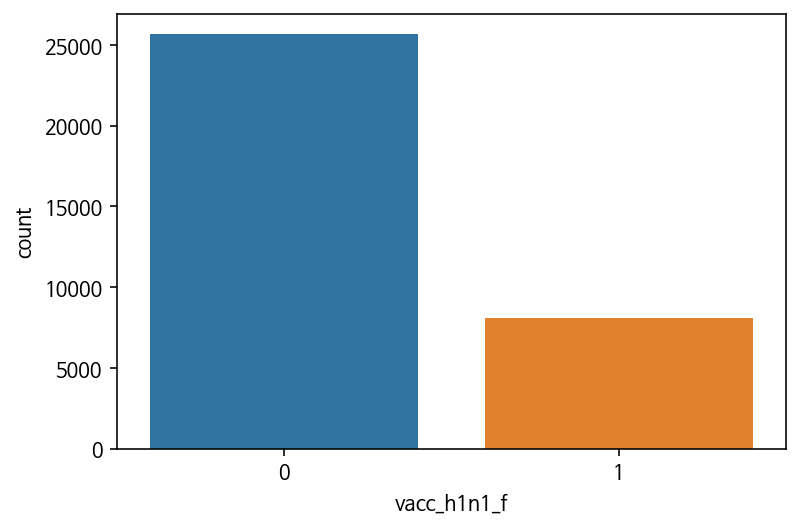

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(x=train[target]);

In [ ]:
# mode(): Return the highest frequency value in a Series.
y_train = train[target]
major = y_train.mode()[0]

# 타겟 샘플 수 만큼 0이 담긴 리스트를 만들어 기준모델로 예측
y_pred = [major] * len(y_train)

In [ ]:
# 최빈클래스를 기준으로 정확도 계산
from sklearn.metrics import accuracy_score
print("training accuracy: ", accuracy_score(y_train, y_pred))

training accuracy:  0.7609346736648578


- 훈련 세트에서 정확도를 f1_score 기준으로도 계산해보자

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train, y_pred)

0.0

In [ ]:
# 검증세트에서 정확도 확인
y_val = val[target]
y_pred = [major] * len(y_val)
print("validation accuracy: ", accuracy_score(y_val, y_pred))

validation accuracy:  0.7610010674890286


- 검증 세트에서 정확도를 f1_score 기준으로도 계산해보자

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_val, y_pred)

0.0

#### **Data fields**

- 특성이 매우 많기 때문에 모두 해석하지는 않고,
- 타겟과 유심히 보아야 할 특성 위주로 설명해야 할 것 같다.

targets
- vacc_h1n1_f - Whether respondent received H1N1 flu vaccine. (This is the target you need to predict for the competition)
  - A형독감 백신을 맞았는지를 판별하는 것이 이번 분석의 목표이다. 캐글 competition에서 이 특성을 타겟으로 사용한다.
- vacc_seas_f - Whether respondent received seasonal flu vaccine.
  - 계절독감 백신을 맞았는지 여부. 이번 캐글 competition에서는 타겟으로 사용하지 않는다.


features
- For all binary variables: 0 = No; 1 = Yes. 
  - (binary는 모두 0: 아니다, 1: 그렇다로 이해하면 된다.) 
* h1n1_concern - Level of concern about the H1N1 flu. 
  - A형 독감에 대해 얼마나 염려하는지
  * 0 = Not at all concerned;
  * 1 = Not very concerned; 
  * 2 = Somewhat concerned; 
  * 3 = Very concerned. 
  
* h1n1_knowledge - Level of knowledge about H1N1 flu. 
  - A형 독감에 대해 얼마나 지식이 있는지
  * 0 = No knowledge; 
  * 1 = A little knowledge; 
  * 2 = A lot of knowledge.

* behavioral~ : 아래의 특정한 행동을 하는지
* behavioral_antiviral_meds - Has taken antiviral medications. (binary)
* behavioral_avoidance - Has avoided close contact with others with flu-like symptoms. (binary)
* behavioral_face_mask - Has bought a face mask. (binary)
* behavioral_wash_hands - Has frequently washed hands or used hand sanitizer. (binary)
* behavioral_large_gatherings - Has reduced time at large gatherings. (binary)
* behavioral_outside_home - Has reduced contact with people outside of own household. (binary)
* behavioral_touch_face - Has avoided touching eyes, nose, or mouth. (binary)

* 의료진의 독감백신 추천 여부 및 만성질환 여부
* doctor_recc_h1n1 - H1N1 flu vaccine was recommended by doctor. (binary)
* doctor_recc_seasonal - Seasonal flu vaccine was recommended by doctor. (binary)
* chronic_med_condition - Has any of the following chronic medical conditions: 
  - asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)


* child_under_6_months - Has regular close contact with a child under the age of six months. (binary)
* health_insurance - Has health insurance. (binary)
* health_worker - Is a healthcare worker. (binary)

* opinion_h1n1_vacc_effective - Respondent's opinion about H1N1 vaccine effectiveness. 
  - Not at all effective; 
  - Not very effective; 
  - Don't know; 
  - Somewhat effective; 
  - Very effective

* opinion_h1n1_risk - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine. 
  * Very Low; 
  * Somewhat low; 
  * Don't know; 
  * Somewhat high; 
  * Very high
* opinion_h1n1_sick_from_vacc - Respondent's worry of getting sick from taking H1N1 vaccine. 
  * Not at all worried; 
  * Not very worried; 
  * Don't know; 
  * Somewhat worried; Very worried
* opinion_seas_vacc_effective - Respondent's opinion about seasonal flu vaccine effectiveness. 
  * Not at all effective; 
  * Not very effective; 
  * Don't know; 
  * Somewhat effective; 
  * Very effective
* opinion_seas_risk - Respondent's opinion about risk of getting sick with seasonal flu without vaccine. 
  * Very Low; 
  * Somewhat low; 
  * Don't know; 
  * Somewhat high; 
  * Very high
* opinion_seas_sick_from_vacc - Respondent's worry of getting sick from taking seasonal flu vaccine. 
  * Not at all worried; 
  * Not very worried; 
  * Don't know; 
  * Somewhat worried; 
  * Very worried
* agegrp - Age group of respondent. 
  * 6 Months - 9 Years; 
  * 10 - 17 Years; 
  * 18 - 34 Years; 
  * 35 - 44 Years; 
  * 45 - 54 Years; 
  * 55 - 64 Years; 
  * 65+ Years
* education_comp - Self-reported education level.
  * 1 = < 12 Years; 
  * 2 = 12 Years; 
  * 3 = Some College; 
  * 4 = College Graduate
* raceeth4_i - Race of respondent.
  * 1 = Hispanic; 
  * 2 = Non-Hispanic, Black Only; 
  * 3 = Non-Hispanic, White Only; 
  * 4 = Non-Hispanic, Other or Multiple Races
* sex_i - Sex of respondent.
  * 1 = Male; 
  * 2 = Female
* inc_pov - Household annual income of respondent with respect to 2008 Census poverty thresholds.
  * 1 = > $75,000;
  * 2 = <= $75,000; 
  * 3 = Below Poverty; 
  * 4 = Unknown
* marital - Marital status of respondent.
  * 1 = Married; 
  * 2 = Not Married
* rent_own_r - Housing situation of respondent.
  * 1 = Home is Owned; 
  * 2 = Home is Rented or Other Arrangement
* employment_status - Employment status of respondent.
  * Employed; 
  * Not in Labor Force; 
  * Unemployed
* census_region - True census region of residence 
  * 1=northeast; 
  * 2=midwest; 
  * 3=south; 
  * 4=west
* census_msa - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
* n_adult_r - Number of other adults in household.
* household_children - Number of children in household.
* n_people_r - Number of adults in the household.
* employment_industry - Type of industry respondent is employed in.
* employment_occupation - Type of occupation of respondent. Values are represented as short random character strings.
* hhs_region - HHS surveillance region number
  * Region 1: CT,ME,MA,NH,RI,VT
  * Region 2: NJ,NY
  * Region 3: DE,DC,MD,PA,VA,WV
  * Region 4: AL,FL,GA,KY,MS,NC,SC,TN
  * Region 5: IL,IN,MI,MN,OH,WI
  * Region 6: AR,LA,NM,OK,TX
  * Region 7: IA,KS,MO,NE
  * Region 8: CO,MT,ND,SD,UT,WY
  * Region 9: AZ,CA,HI,NV
  * Region 10: AK,ID,OR,WA
* state - State of residence

#### Profile report 사용하기
- 데이터를 좀 더 자세히 살펴보기 위해 Profile report를 사용해보자

In [ ]:
# !pip3 install -U pandas-profiling

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(train, minimal=True).to_notebook_iframe()

Summarize dataset:   0%|          | 0/48 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

프로파일 리포트를 살펴보고 어떤 부분을 확인하거나 수정할지 정한다.
- 먼저, Unique인 df_index(행번호)를 삭제해주는 것이 좋겠다.
- 결측치가 많은 특성들이 있다. 결측치를 채워주는 것이 필요해보인다.
  - imputer를 사용하여 결측치를 채워 줄 것이다.
- 범주형 특성 중에 범주 종류가 너무 많은 것은 cardinality가 높다고 한다. 이 데이터에서는 state(미국 주)가 51가지로 cardinality가 높다.
- 수치형 특성은 3개 뿐이고, 37개 특성이 범주형으로 대부분 범주형 특성을 갖고 있는 데이터이다.
- 수치형 특성 세가지는 아래와 같은데, 현재 데이터타입은 실수형이지만 모두 정수형으로 바꿔도 무방할 것으로 보인다.
  - n_adult_r - 가정 내 어른 수
  - household_children - 가정 내 어린이 수
  - n_people_r - 가정 내 사람 수

실수형 데이터
- csv 파일로 불러온 데이터는 실수형이 상당히 많은데, 범주형데이터에서도 실수형으로 표현이 된 것일까?
- 실수형 데이터만 가져와서 살펴보자.

In [ ]:
train.select_dtypes('float').T

,36598,10893,34996,11584,27260,2132,24019,17781,31133,3971,24860,6126,3377,7283,35243,31337,40709,18607,7162,26153,2670,24645,36104,13872,26773,3525,26847,10480,7835,13114,22446,1187,25157,27030,7570,26997,39940,17564,38647,36445,...,20488,6622,30417,24308,11145,40221,31463,23666,18911,39605,2943,10488,21277,6501,25739,27532,23075,14142,25493,10944,20357,19123,21060,31347,32610,34438,37606,638,26464,16244,11782,22455,41243,31721,32474,22901,7247,30696,34105,34230
h1n1_concern,NaN,NaN,1.0,3.0,2.0,3.0,NaN,2.0,2.0,2.0,1.0,1.0,NaN,NaN,0.0,NaN,2.0,2.0,3.0,1.0,2.0,3.0,2.0,2.0,NaN,1.0,2.0,1.0,2.0,1.0,2.0,0.0,2.0,3.0,0.0,3.0,1.0,3.0,2.0,2.0,...,NaN,1.0,1.0,0.0,3.0,2.0,0.0,2.0,1.0,3.0,NaN,1.0,2.0,NaN,0.0,NaN,2.0,NaN,2.0,NaN,2.0,2.0,2.0,2.0,0.0,1.0,1.0,2.0,NaN,1.0,2.0,1.0,1.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0
h1n1_knowledge,NaN,NaN,2.0,1.0,2.0,0.0,NaN,2.0,1.0,2.0,1.0,1.0,NaN,NaN,1.0,NaN,2.0,2.0,2.0,1.0,2.0,1.0,0.0,1.0,NaN,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,0.0,...,NaN,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,NaN,2.0,1.0,NaN,0.0,NaN,2.0,NaN,2.0,NaN,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,NaN,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0
behavioral_antiviral_meds,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
behavioral_avoidance,NaN,NaN,0.0,1.0,1.0,1.0,NaN,1.0,0.0,1.0,1.0,1.0,NaN,NaN,0.0,NaN,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,NaN,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,NaN,1.0,1.0,NaN,1.0,NaN,0.0,NaN,1.0,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,NaN,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
behavioral_face_mask,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
behavioral_wash_hands,NaN,NaN,1.0,1.0,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,NaN,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,NaN,0.0,1.0,NaN,0.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
behavioral_large_gatherings,NaN,NaN,0.0,1.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,NaN,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,0.0,NaN,1.0,NaN,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
behavioral_outside_home,NaN,NaN,0.0,1.0,0.0,1.0,NaN,0.0,1.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,NaN,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
behavioral_touch_face,NaN,NaN,1.0,1.0,1.0,0.0,NaN,1.0,1.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,NaN,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,NaN,0.0,1.0,NaN,1.0,NaN,0.0,NaN,0.0,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
doctor_recc_h1n1,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,NaN,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0


- 정수형 데이터를 결측치들 때문에 실수형으로 인식한 것 같다.
- 결측치를 채워주고나서 정수형으로 바꿔주도록 하자.

결측치
- 결측치가 상당히 많은 것 같은데 얼마나 되는지 살펴보자.

In [ ]:
train.isna().sum(0)

h1n1_concern                    6771
h1n1_knowledge                  6771
behavioral_antiviral_meds       6847
behavioral_avoidance            6976
behavioral_face_mask            6785
behavioral_wash_hands           6811
behavioral_large_gatherings     6841
behavioral_outside_home         6852
behavioral_touch_face           6896
doctor_recc_h1n1                1513
doctor_recc_seasonal            1513
chronic_med_condition           1067
child_under_6_months            7599
health_insurance               15540
health_worker                   7586
opinion_h1n1_vacc_effective     7062
opinion_h1n1_risk               7099
opinion_h1n1_sick_from_vacc     7139
opinion_seas_vacc_effective     7192
opinion_seas_risk               7248
opinion_seas_sick_from_vacc     7296
agegrp                             0
education_comp                  8157
raceeth4_i                         0
sex_i                              0
inc_pov                            0
marital                         8178
r

- 프로파일 리포트에서도 보았지만, 결측치가 상당히 많다. 
- 결측 데이터를 drop하기에는 수량이 너무 많으므로 Imputer를 사용하여 채워줄 것이다.

Cardinality
- 프로파일리포트에서는 state(미국의 주)가 51개의 값을 가져 cadinality에 주의하라고 나왔는데
- 다른 특성들 중에도 cardinality가 높은 것이 있는지 살펴보자.

In [ ]:
# 여기서, cardinality는 Unique 값을 보면 된다.
train.describe(exclude='number')

,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,agegrp,employment_status,census_msa,employment_industry,employment_occupation,state
count,26661,26624,26584,26531,26475,26427,33723,25465,33723,13741,13741,33723
unique,6,6,6,6,6,6,7,3,3,23,25,51
top,Somewhat Effective,Somewhat Low,Not Very Worried,Somewhat Effective,Somewhat Low,Not At All Worried,65+ Years,Employed,"MSA, Not Principle City",Health Care and Social Assistance Industries,Management Occupations,NEW MEXICO
freq,11759,10042,9302,11557,9095,11837,6797,13747,15237,2452,1754,815


In [ ]:
train.describe(exclude='number').T.sort_values(by='unique', ascending=False).head()

,count,unique,top,freq
state,33723,51,NEW MEXICO,815
employment_occupation,13741,25,Management Occupations,1754
employment_industry,13741,23,Health Care and Social Assistance Industries,2452
agegrp,33723,7,65+ Years,6797
opinion_h1n1_vacc_effective,26661,6,Somewhat Effective,11759


- 문항 중 직업이나 직종 등 다양한 답변이 나올 수 있는 특성들이 cardinality가 높은 것을 볼 수 있다.
- 데이터의 수가 충분하여 overfitting이 염려되는 상황이 아니라면 cardinality가 약간 높아도 사용해볼 수 있을 것이다.
- 어떤 경우에 결과가 좋을지는 모델을 만들어보고 검증데이터를 통해 확인할 수 있겠다.

#### 그 외 특성공학 해보기
- 함수를 작성하여 원하는 특성들을 선택할 수 있도록 해보자.
- 범주형 특성이 매우 많은 데이터이므로 cardinality가 20보다 큰 것을 제외하고 모델을 만들어보자.
  - 특히나 직업, 직종은 결측치도 매우 많았기 때문에 제외하는 편이 나을 것 같다.

In [ ]:
import numpy as np

def engineer(df):
    """특성을 엔지니어링 하는 함수입니다."""
    
    # 높은 카디널리티를 가지는 특성을 제거
    selected_cols = df.select_dtypes(include=['number', 'object'])
    labels = selected_cols.nunique() # 특성별 카디널리티 리스트
    selected_features = labels[labels <= 20].index.tolist() # 카디널리티가 20보다 작은 특성만 선택
    df = df[selected_features]
    
    # 새로운 특성을 생성합니다.
    # behaviorals = [col for col in df.columns if 'behavioral' in col] 
    # df['behaviorals'] = df[behaviorals].sum(axis=1)
    
    
    # dels = [col for col in df.columns if ('employment' in col or 'seas' in col)]
    # df.drop(columns=dels, inplace=True)
        
    return df


train1 = engineer(train)
val1 = engineer(val)
test1 = engineer(test)

특성과 타겟으로 분리해주기

In [ ]:
features = train1.drop(columns=[target]).columns

In [ ]:
# 훈련/검증/테스트 데이터를 특성과 타겟으로 분리
X_train = train1[features]
y_train = train1[target]
X_val = val1[features]
y_val = val1[target]
X_test = test1[features]

### 2) 모델 개발
- 결정트리를 학습시킵니다. 하이퍼파라미터를 수정하여 성능을 높여보세요. 과적합을 주의하세요!
- 검증세트 스코어를 확인하세요.(평가지표는 F1-score입니다, 수식은 캐글 Overview-Evaluation 페이지를 확인해 주세요. 평가지표에 대한 내용은 다음에 자세히 배우고 활용할 것입니다 지금은 스코어를 올리기 위한 노력을 전혀 기울이지 말고 결정트리의 개념과 코드이해, 사용에 집중하세요!)
- 특성중요도를 그래프로 나타내 보세요

#### 파이프라인 라이브러리를 이용하여 결정트리를 학습 시키기
- 범주형 데이터가 많으므로 원핫인코딩을 시행해준다.
- SimpleImputer를 사용하여 결측치를 평균값으로 맞춰준다.
- 결정트리를 사용하여 모델을 학습한다.(지니불순도 사용)
- 훈련데이터와 검증데이터에서 정확도를 확인한다.

In [ ]:
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    DecisionTreeClassifier(random_state=11, criterion='gini')
)

pipe.fit(X_train, y_train)

y_pred_train = pipe.predict(X_train)
y_pred_val = pipe.predict(X_val)
print('훈련 정확도: ', pipe.score(X_train, y_train))
print('검증 정확도: ', pipe.score(X_val, y_val))
print('----------')
print('훈련 정확도(f1_score):', f1_score(y_train, y_pred_train))
print('검증 정확도(f1_score):', f1_score(y_val, y_pred_val))


훈련 정확도:  0.99157844794354
검증 정확도:  0.7528169849365437
----------
훈련 정확도(f1_score): 0.9821518350930115
검증 정확도(f1_score): 0.4866995073891625


- overfitting이 발생하였음을 알 수 있다.
- 검증 정확도는 accuracy_score 기준, 기준모델과 거의 유사하고
- f1_score 기준, 기준모델보다는 낫지만 훈련정확도에 비해 현저히 떨어지므로 overfitting(과적합) 상태이다.

#### 시각화
- 만들어진 트리를 시각화해보자
- depth 제한을 2로 두고 결정트리의 일부만 한 번 살펴보자.

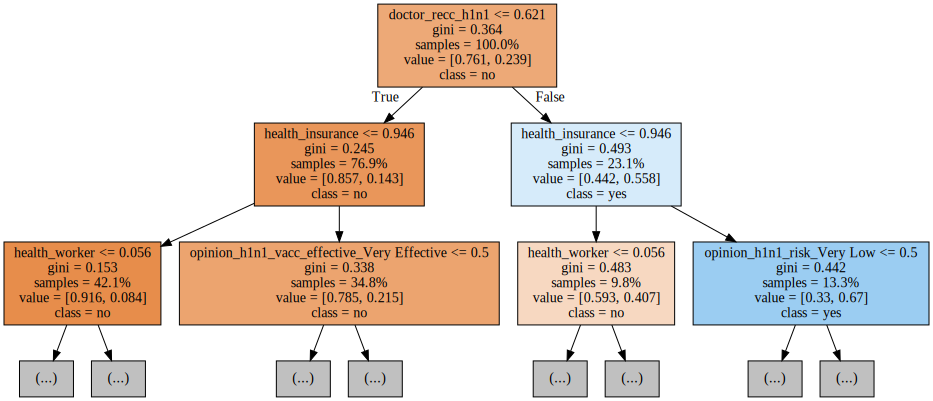

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

model_dt = pipe.named_steps['decisiontreeclassifier']
enc = pipe.named_steps['onehotencoder']
encoded_columns = enc.transform(X_val).columns

dot_data = export_graphviz(model_dt
                          , max_depth=2
                          , feature_names=encoded_columns
                          , class_names=['no', 'yes']
                          , filled=True
                          , proportion=True)


display(graphviz.Source(dot_data))

#### 하이퍼파라미터 조정
- 하이퍼파라미터를 조정하여 과적합을 해결하고 일반화를 유도해보자.
- 결정트리의 복잡도를 줄이기 위해 자주 사용하는 하이퍼파라미터는 아래와 같다.
  - min_samples_split : 노드 하나에 걸리는 샘플의 갯수가 지정한 갯수보다 작으면 더이상 스플릿 하지 않는다. 
    - (ex. 노드 하나에 1000개 미만으로 샘플 있으면 더이상 스플릿 하지 않게 하기)
  - min_sample_leaf : 말단 노드에 걸리는 샘플의 최소 갯수를 지정한다. 
    - (ex. 말단 노드 왼쪽, 오른쪽에 최소 100개는 걸리게 만들기)
  - max_depth : 트리구조의 깊이 결정. 가장 강력하게 일반화를 이끌어내는 하이퍼파라미터이다.

- 이번 과제에서는 min_samples_split을 사용하여 노드에서 스플릿 할 때 최소 샘플의 갯수를 지정해보겠다.
- 이 값을 바꿔가며 좋은 결과를 얻어낼 수 있도록 해 볼 것이다.

for min_sample_split = 810
훈련 정확도(f1_score): 0.5585221748560317
검증 정확도(f1_score): 0.5576407506702413
for min_sample_split = 760
훈련 정확도(f1_score): 0.5585221748560317
검증 정확도(f1_score): 0.5576407506702413
for min_sample_split = 710
훈련 정확도(f1_score): 0.5585221748560317
검증 정확도(f1_score): 0.5576407506702413
for min_sample_split = 660
훈련 정확도(f1_score): 0.5585221748560317
검증 정확도(f1_score): 0.5576407506702413
for min_sample_split = 610
훈련 정확도(f1_score): 0.5545718210960159
검증 정확도(f1_score): 0.5529340592861465
for min_sample_split = 560
훈련 정확도(f1_score): 0.5625565269822128
검증 정확도(f1_score): 0.5627057767135588
for min_sample_split = 510
훈련 정확도(f1_score): 0.5719371106496589
검증 정확도(f1_score): 0.5675675675675675
for min_sample_split = 460
훈련 정확도(f1_score): 0.565952309085421
검증 정확도(f1_score): 0.5572885422915417
for min_sample_split = 410
훈련 정확도(f1_score): 0.5739803512950283
검증 정확도(f1_score): 0.5614973262032086
for min_sample_split = 360
훈련 정확도(f1_score): 0.5822896066798505
검증 정확도(f1_score): 0.57050906

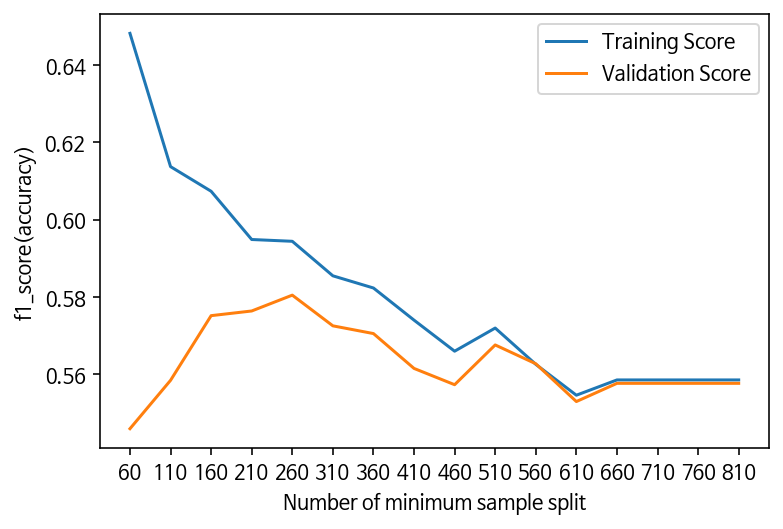

In [ ]:
xaxis = np.arange(810,10,-50)
training = []
validation = []

for i in xaxis:
  print('for min_sample_split =',i)
  pipe = make_pipeline(
      OneHotEncoder(use_cat_names=True), 
      SimpleImputer(), 
      DecisionTreeClassifier(random_state=11, criterion='gini',
                            min_samples_split= i)
  )

  pipe.fit(X_train, y_train)
  y_pred_train = pipe.predict(X_train)
  y_pred_val = pipe.predict(X_val)

  print('훈련 정확도(f1_score):', f1_score(y_train, y_pred_train))
  print('검증 정확도(f1_score):', f1_score(y_val, y_pred_val))

  training.append(f1_score(y_train, y_pred_train))
  validation.append(f1_score(y_val, y_pred_val))

plt.plot(xaxis, training, label='Training Score')
plt.plot(xaxis, validation, label='Validation Score')
plt.title('')
plt.xticks(xaxis)
plt.xlabel('Number of minimum sample split')
plt.ylabel('f1_score(accuracy)')
plt.legend();
  

- min_sample_split = 260 일 때 검증데이터셋의 f1_score(평가지표)가 가장 좋게 나왔다.
- 이보다 더 적은 수의 샘플이 있을 때 split을 하면 과적합이 일어나게 되는 것으로 보인다.
- for min_sample_split = 260
    - 훈련 정확도(f1_score): 0.5943665999428082
    - 검증 정확도(f1_score): 0.5804434337691871

그다지 만족스러운 결과를 얻지 못해서 이번에는 max_depth를 조정해보았다.

for max_depth = 5
훈련 정확도(f1_score): 0.5323253799511773
검증 정확도(f1_score): 0.5404732254047323
for max_depth = 6
훈련 정확도(f1_score): 0.5412175015852885
검증 정확도(f1_score): 0.5369085173501578
for max_depth = 7
훈련 정확도(f1_score): 0.5829295564666418
검증 정확도(f1_score): 0.5626295528575659
for max_depth = 8
훈련 정확도(f1_score): 0.6046849992725156
검증 정확도(f1_score): 0.5713457076566125
for max_depth = 9
훈련 정확도(f1_score): 0.613901045916475
검증 정확도(f1_score): 0.5482534043812907
for max_depth = 10
훈련 정확도(f1_score): 0.6442293591435694
검증 정확도(f1_score): 0.5450843513670738
for max_depth = 11
훈련 정확도(f1_score): 0.6685212298682285
검증 정확도(f1_score): 0.5383720930232557
for max_depth = 12
훈련 정확도(f1_score): 0.7054019200458519
검증 정확도(f1_score): 0.5308924485125859
for max_depth = 13
훈련 정확도(f1_score): 0.7428928026625988
검증 정확도(f1_score): 0.527277762392689
for max_depth = 14
훈련 정확도(f1_score): 0.7699798288933714
검증 정확도(f1_score): 0.5214029273681303
for max_depth = 15
훈련 정확도(f1_score): 0.8032293377120963
검증 정확도(f1_score): 0.5

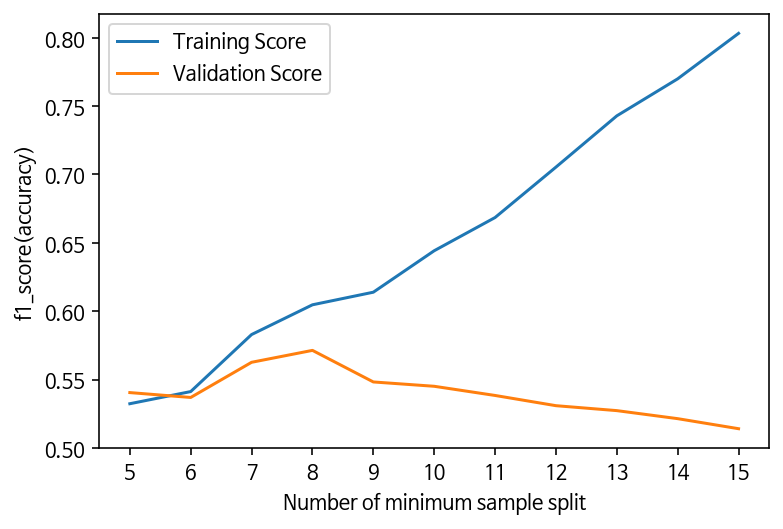

In [ ]:
xaxis = np.arange(5,16)
training = []
validation = []

for i in xaxis:
  print('for max_depth =',i)
  pipe = make_pipeline(
      OneHotEncoder(use_cat_names=True), 
      SimpleImputer(), 
      DecisionTreeClassifier(random_state=11, criterion='gini',
                            max_depth= i)
  )

  pipe.fit(X_train, y_train)
  y_pred_train = pipe.predict(X_train)
  y_pred_val = pipe.predict(X_val)

  print('훈련 정확도(f1_score):', f1_score(y_train, y_pred_train))
  print('검증 정확도(f1_score):', f1_score(y_val, y_pred_val))

  training.append(f1_score(y_train, y_pred_train))
  validation.append(f1_score(y_val, y_pred_val))

plt.plot(xaxis, training, label='Training Score')
plt.plot(xaxis, validation, label='Validation Score')
plt.title('')
plt.xticks(xaxis)
plt.xlabel('Number of minimum sample split')
plt.ylabel('f1_score(accuracy)')
plt.legend();

- max_depth = 8 일 때 검증데이터셋의 f1_score(평가지표)가 가장 좋게 나왔다.
- 이 값을 넘어서서 트리가 깊어질수록(결정 단계가 많아질수록) 과적합이 일어나는 것으로 보인다.
- for max_depth = 8
  - 훈련 정확도(f1_score): 0.6046849992725156
  - 검증 정확도(f1_score): 0.5713457076566125

#### 특성 중요도
- 결정트리에서는 회귀계수 대신, 특성중요도를 확인할 수 있다.
- 특성중요도는 양수값만 가지며 높은 값을 가지는 특성이 일찍, 자주 분기에 사용된다.
- 이러한 특성의 불순도가 낮다고 표현한다.

In [ ]:
pipe.named_steps

{'decisiontreeclassifier': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=15, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=11, splitter='best'),
 'onehotencoder': OneHotEncoder(cols=['opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
                     'opinion_h1n1_sick_from_vacc',
                     'opinion_seas_vacc_effective', 'opinion_seas_risk',
                     'opinion_seas_sick_from_vacc', 'agegrp',
                     'employment_status', 'census_msa'],
               drop_invariant=False, handle_missing='value',
               handle_unknown='value', return_df=True, use_cat_names=True,
               verbose=0),
 'simpleimputer': SimpleImputer(add_indicator=F

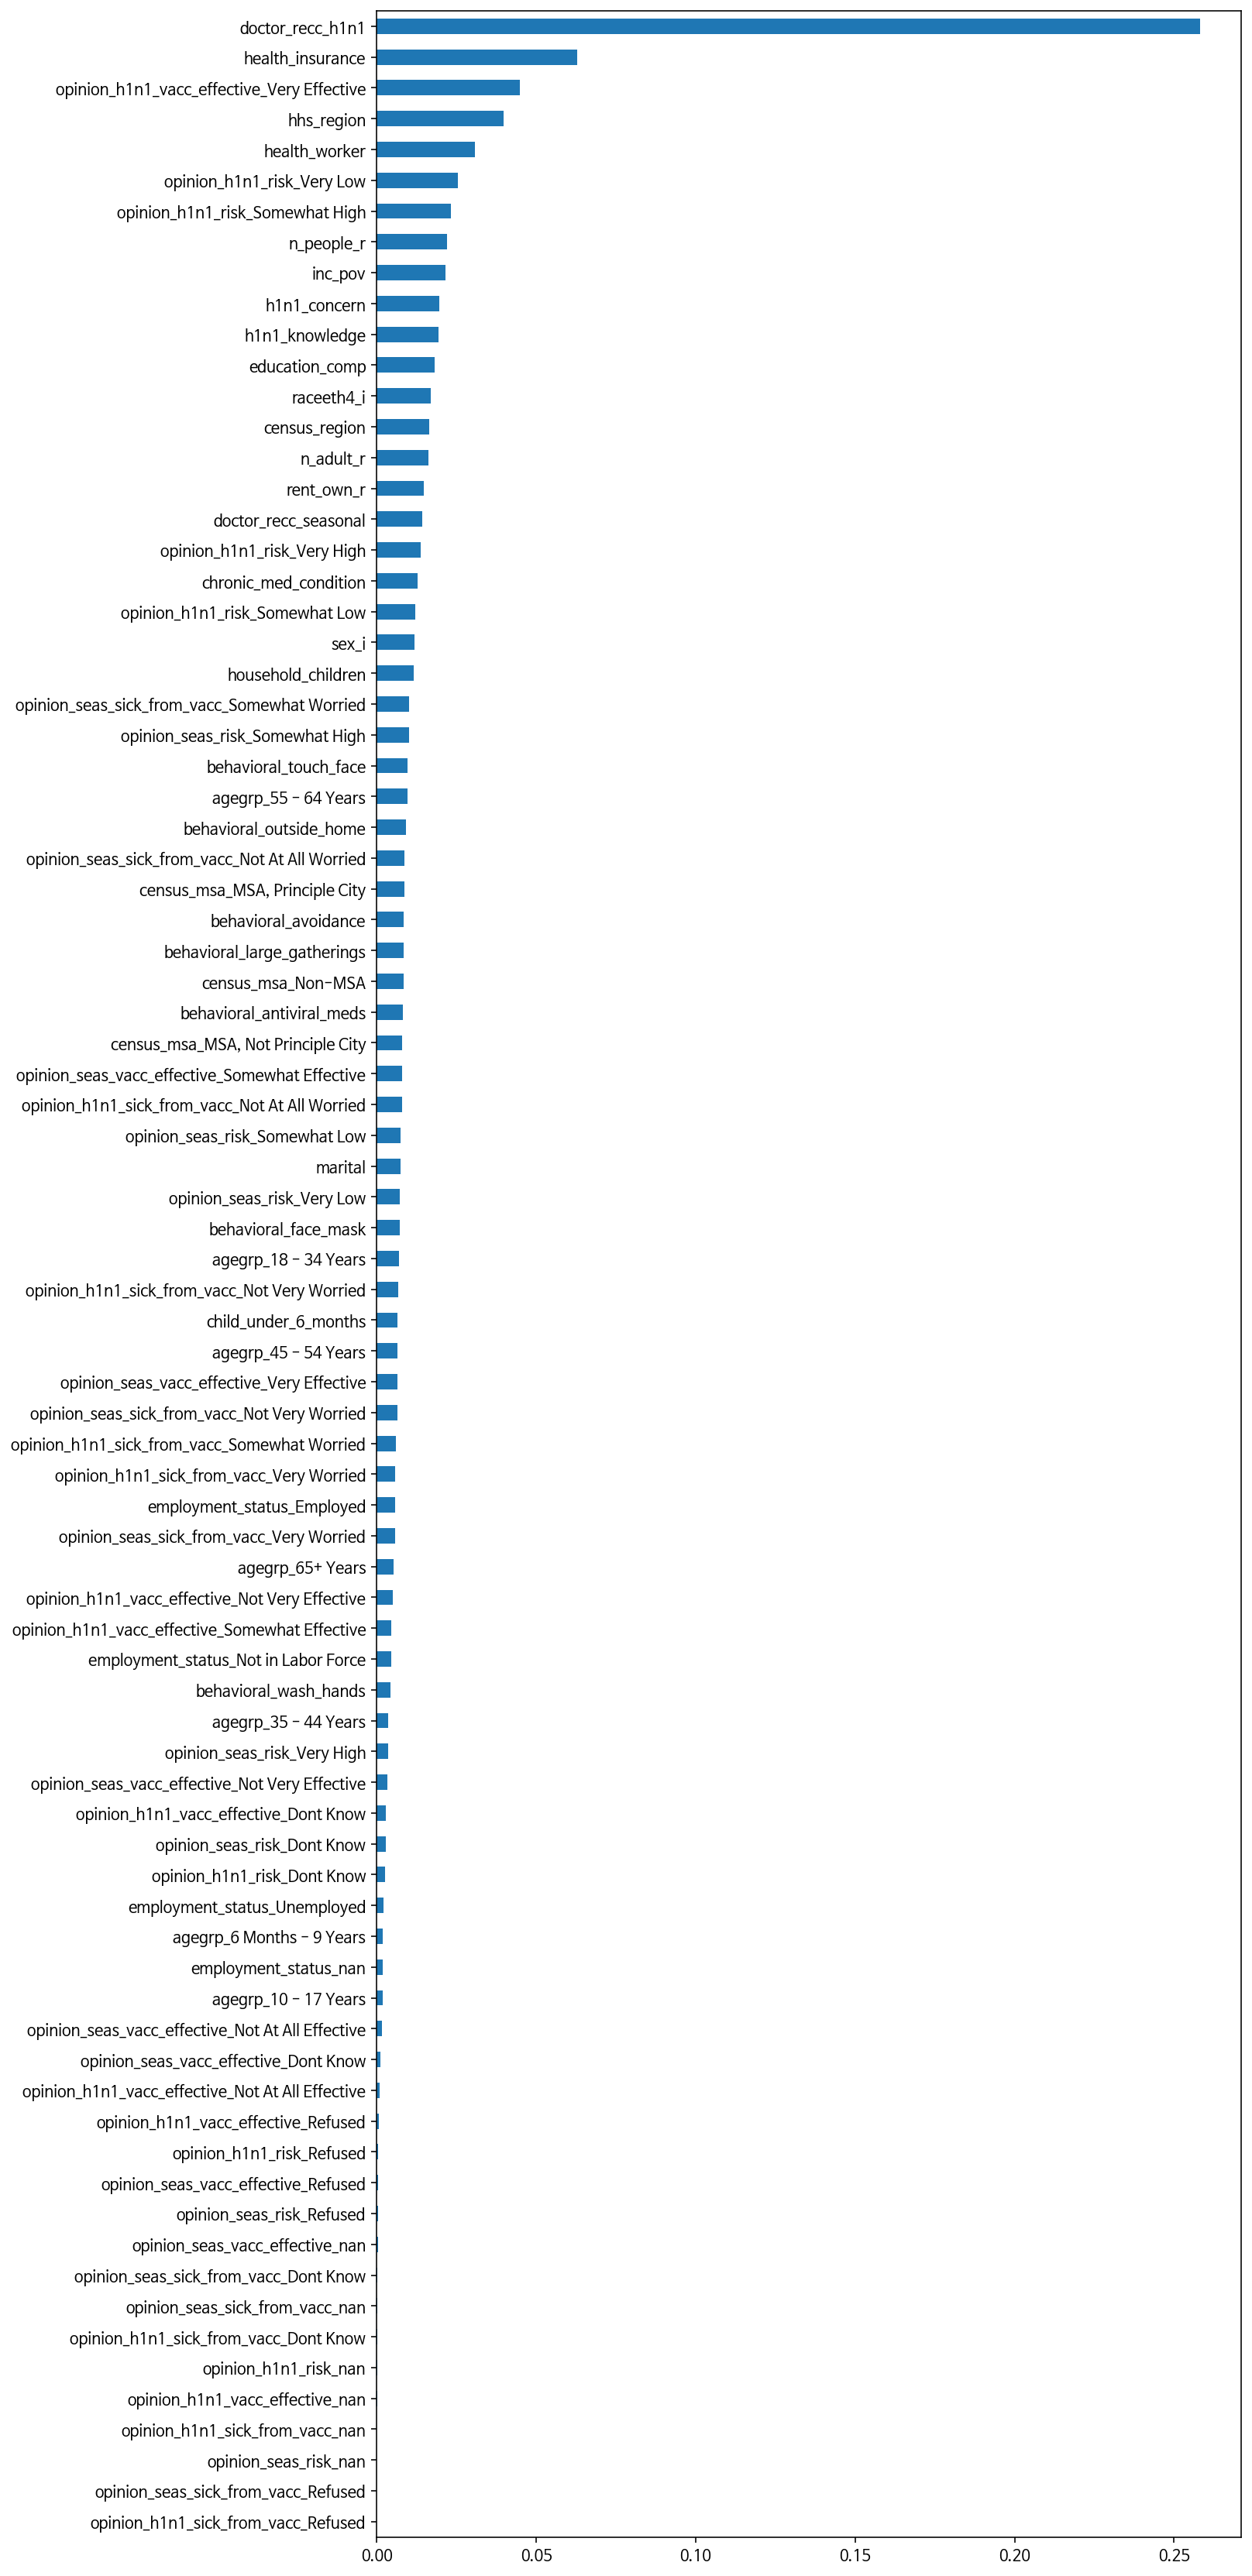

In [ ]:
import matplotlib.pyplot as plt

model_dt = pipe.named_steps['decisiontreeclassifier']

importances = pd.Series(model_dt.feature_importances_, encoded_columns)
plt.figure(figsize=(10,30))
importances.sort_values().plot.barh();

- dortor_recc_h1n1 : 의사에게 A형독감 백신 접종을 추천받았는지 여부의 특성중요도가 가장 높게 나왔다.
- hhs_region : 다른 특성으로는 HHS(U.S. Department of Health & Human Services) 감시지역번호가 중요하다고 나왔으며 
- health_insurance : 또 건강보험 유무가 중요하다고 나왔다.

### 3) 캐글 대회 참여

- 테스트셋에 대한 예측 결과를 캐글에 제출 하세요.(스코어가 많이 낮게 나와도 결정트리를 잘 이해하고 결과를 내었다면 충분합니다!)
 

In [ ]:
# 위에서 가장 좋은 결과를 보여준 min_samples_split= 260 일 때의 모델로 테스트셋에 대한 예측결과를 출력한다.

pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    DecisionTreeClassifier(random_state=11, criterion='gini',
                          min_samples_split= 260)
)

pipe.fit(X_train, y_train)

y_pred_test = pipe.predict(X_test)

print(y_pred_test)

[0 0 0 ... 0 0 0]


In [ ]:
sub = pd.read_csv('submission.csv')
sub['vacc_h1n1_f']=y_pred_test
sub.describe()

,Id,vacc_h1n1_f
count,28104.000000,28104.000000
mean,14051.500000,0.174317
std,8113.070319,0.379388
min,0.000000,0.000000
25%,7025.750000,0.000000
50%,14051.500000,0.000000
75%,21077.250000,0.000000
max,28103.000000,1.000000


In [ ]:
sub.to_csv('submission_ms1.csv', index=False)

### 4) 🔥 도전과제
- 다른 종류의 imputer를 사용해 보세요([scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html))
- seaborn plots 사용하여 관심있는 특성들과 target간의 관계를 그래프로 나타내 보세요.
- [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html)
- [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html)

#### 관심있는 특성들과 target간의 관계를 그래프로 나타내기
- 높은 특성중요도가 나온 특성에 대해 그래프로 나타내보자
- 모자이크 플롯을 이용해보기

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
train['Recommended'] = train.doctor_recc_h1n1.map({0.0:'백신 추천받지 않음', 1.0:'백신 추천 받음'})
train['Health_Insurance'] = train.health_insurance.map({0.0:'보험 없음', 1.0:'보험 있음'})
train['H1N1_Vaccine_Received'] = train.vacc_h1n1_f.map({0.0:'백신 안맞음', 1.0:'백신 맞음'})

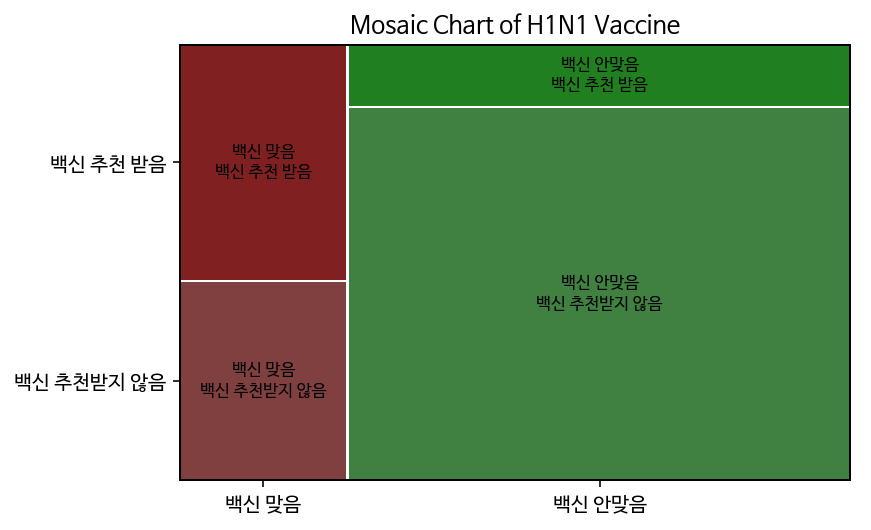

In [ ]:
mosaic(train, ['H1N1_Vaccine_Received', 'Recommended'])
plt.title('Mosaic Chart of H1N1 Vaccine')
plt.show();

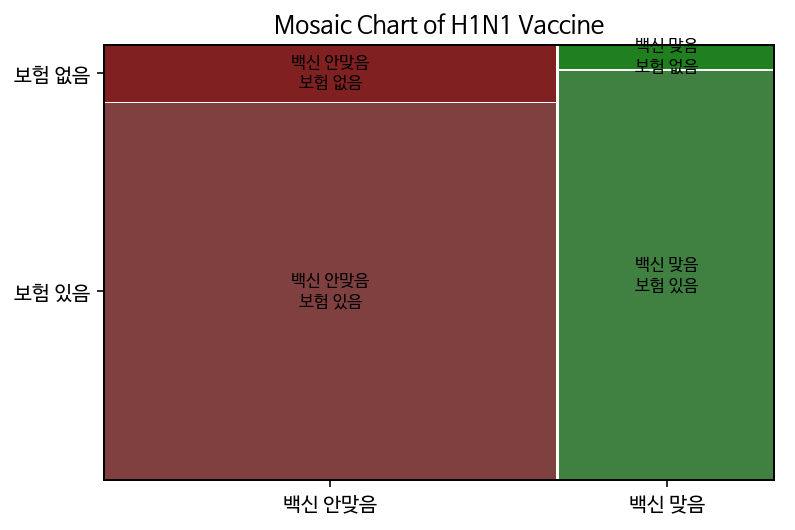

In [ ]:
mosaic(train, ['H1N1_Vaccine_Received','Health_Insurance'])
plt.title('Mosaic Chart of H1N1 Vaccine')
plt.show();

#### Seaborn의 plot을 사용해보기

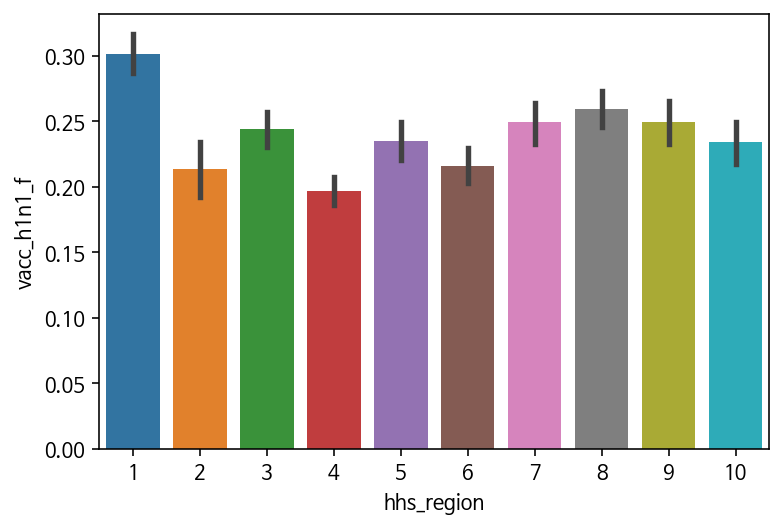

In [ ]:
sns.barplot(x='hhs_region', y='vacc_h1n1_f',data=train)

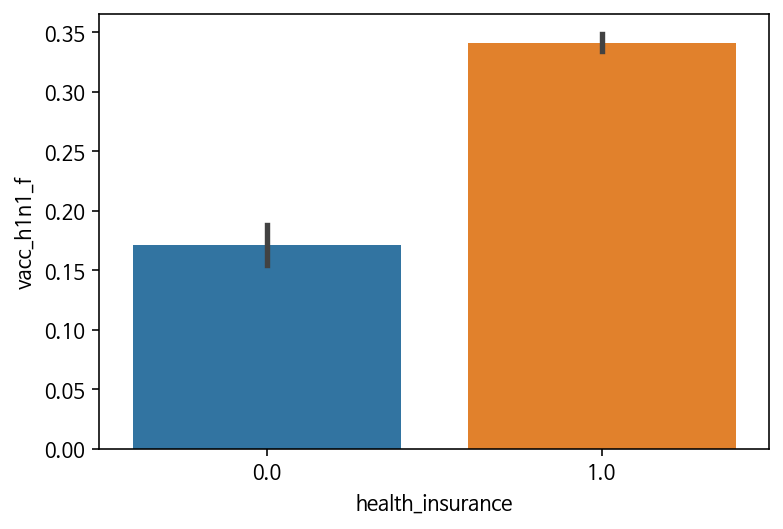

In [ ]:
sns.barplot(x='health_insurance', y='vacc_h1n1_f',data=train)

#### 다른 종류의 imputer 사용하기
- KNNImputer : 분석대상을 중심으로 가장 가까운 k개 요소(이웃)들 중에서 가장 많은 수의 집단으로 분류하는 방법을 사용해보자.

In [ ]:
from sklearn.impute import KNNImputer

pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    KNNImputer(n_neighbors=2), 
    DecisionTreeClassifier(random_state=11, criterion='gini',
                          min_samples_split= 260)
)

pipe.fit(X_train, y_train)
y_pred_train = pipe.predict(X_train)
y_pred_val = pipe.predict(X_val)

print('훈련 정확도(f1_score):', f1_score(y_train, y_pred_train))
print('검증 정확도(f1_score):', f1_score(y_val, y_pred_val))

훈련 정확도(f1_score): 0.5502746246796045
검증 정확도(f1_score): 0.5277940315974254


In [ ]:
from sklearn.impute import KNNImputer

pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    KNNImputer(n_neighbors=2), 
    DecisionTreeClassifier(random_state=11, criterion='gini',
                          min_samples_split=1000)
)

pipe.fit(X_train, y_train)
y_pred_train = pipe.predict(X_train)
y_pred_val = pipe.predict(X_val)

print('훈련 정확도(f1_score):', f1_score(y_train, y_pred_train))
print('검증 정확도(f1_score):', f1_score(y_val, y_pred_val))

훈련 정확도(f1_score): 0.5500560852495794
검증 정확도(f1_score): 0.5489977728285078


In [ ]:
from sklearn.impute import KNNImputer

pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    KNNImputer(n_neighbors=2), 
    DecisionTreeClassifier(random_state=11, criterion='gini',
                          min_samples_split=1500)
)

pipe.fit(X_train, y_train)
y_pred_train = pipe.predict(X_train)
y_pred_val = pipe.predict(X_val)

print('훈련 정확도(f1_score):', f1_score(y_train, y_pred_train))
print('검증 정확도(f1_score):', f1_score(y_val, y_pred_val))

훈련 정확도(f1_score): 0.5505096027178812
검증 정확도(f1_score): 0.5492028587135789


In [ ]:
from sklearn.impute import KNNImputer

pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    KNNImputer(n_neighbors=2), 
    DecisionTreeClassifier(random_state=11, criterion='gini',
                          min_samples_split=500)
)

pipe.fit(X_train, y_train)
y_pred_train = pipe.predict(X_train)
y_pred_val = pipe.predict(X_val)

print('훈련 정확도(f1_score):', f1_score(y_train, y_pred_train))
print('검증 정확도(f1_score):', f1_score(y_val, y_pred_val))

훈련 정확도(f1_score): 0.5527246992215146
검증 정확도(f1_score): 0.5527723050942867


In [ ]:
from sklearn.impute import KNNImputer

pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    KNNImputer(n_neighbors=2), 
    DecisionTreeClassifier(random_state=11, criterion='gini',
                          min_samples_split=700)
)

pipe.fit(X_train, y_train)
y_pred_train = pipe.predict(X_train)
y_pred_val = pipe.predict(X_val)

print('훈련 정확도(f1_score):', f1_score(y_train, y_pred_train))
print('검증 정확도(f1_score):', f1_score(y_val, y_pred_val))

훈련 정확도(f1_score): 0.5518018018018017
검증 정확도(f1_score): 0.5520716685330348


In [ ]:
# 위에서 min_samples_split= 700 일 때의 모델로 테스트셋에 대한 예측결과를 출력한다.

y_pred_test = pipe.predict(X_test)

print(y_pred_test)

[0 0 0 ... 0 0 0]


In [ ]:
sub = pd.read_csv('submission.csv')
sub['vacc_h1n1_f']=y_pred_test
sub.describe()

,Id,vacc_h1n1_f
count,28104.000000,28104.000000
mean,14051.500000,0.178373
std,8113.070319,0.382833
min,0.000000,0.000000
25%,7025.750000,0.000000
50%,14051.500000,0.000000
75%,21077.250000,0.000000
max,28103.000000,1.000000


In [ ]:
sub.to_csv('submission_ms2.csv', index=False)

In [ ]:
pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    DecisionTreeClassifier(random_state=11, criterion='entropy',
                          max_depth = 8)
)

pipe.fit(X_train, y_train)
y_pred_train = pipe.predict(X_train)
y_pred_val = pipe.predict(X_val)

print('훈련 정확도(f1_score):', f1_score(y_train, y_pred_train))
print('검증 정확도(f1_score):', f1_score(y_val, y_pred_val))

훈련 정확도(f1_score): 0.5994907238995999
검증 정확도(f1_score): 0.5752469494479953


for min_sample_split = 210
훈련 정확도(f1_score): 0.5967660797700324
검증 정확도(f1_score): 0.5804794520547946
for min_sample_split = 215
훈련 정확도(f1_score): 0.5967660797700324
검증 정확도(f1_score): 0.5804794520547946
for min_sample_split = 220
훈련 정확도(f1_score): 0.5968226706741091
검증 정확도(f1_score): 0.5829545454545456
for min_sample_split = 225
훈련 정확도(f1_score): 0.5975062344139651
검증 정확도(f1_score): 0.5825791855203619
for min_sample_split = 230
훈련 정확도(f1_score): 0.5960728311317386
검증 정확도(f1_score): 0.5840657782818259
for min_sample_split = 235
훈련 정확도(f1_score): 0.5961153956012567
검증 정확도(f1_score): 0.5842314237095859
for min_sample_split = 240
훈련 정확도(f1_score): 0.5960728311317386
검증 정확도(f1_score): 0.5840657782818259
for min_sample_split = 245
훈련 정확도(f1_score): 0.5961153956012567
검증 정확도(f1_score): 0.5842314237095859
for min_sample_split = 250
훈련 정확도(f1_score): 0.5960728311317386
검증 정확도(f1_score): 0.5840657782818259
for min_sample_split = 255
훈련 정확도(f1_score): 0.5961153956012567
검증 정확도(f1_score): 0.5842314

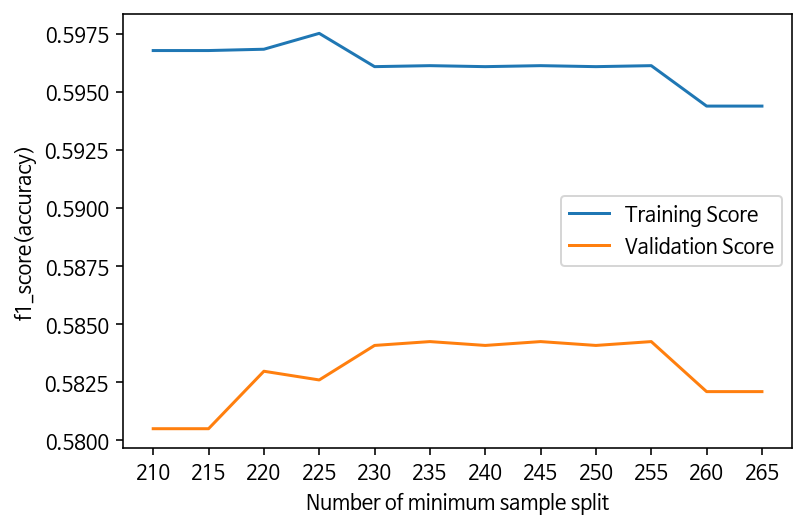

In [ ]:
xaxis = np.arange(210,270,5)
training = []
validation = []

for i in xaxis:
  print('for min_sample_split =',i)
  pipe = make_pipeline(
      OneHotEncoder(use_cat_names=True), 
      SimpleImputer(), 
      DecisionTreeClassifier(random_state=11, criterion='entropy',
                            min_samples_split= i)
  )

  pipe.fit(X_train, y_train)
  y_pred_train = pipe.predict(X_train)
  y_pred_val = pipe.predict(X_val)

  print('훈련 정확도(f1_score):', f1_score(y_train, y_pred_train))
  print('검증 정확도(f1_score):', f1_score(y_val, y_pred_val))

  training.append(f1_score(y_train, y_pred_train))
  validation.append(f1_score(y_val, y_pred_val))

plt.plot(xaxis, training, label='Training Score')
plt.plot(xaxis, validation, label='Validation Score')
plt.title('')
plt.xticks(xaxis)
plt.xlabel('Number of minimum sample split')
plt.ylabel('f1_score(accuracy)')
plt.legend();
  

In [ ]:
pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    DecisionTreeClassifier(random_state=11, criterion='entropy',
                          min_samples_split= 255)
)

pipe.fit(X_train, y_train)
y_pred_train = pipe.predict(X_train)
y_pred_val = pipe.predict(X_val)

In [ ]:
# 위에서 min_samples_split= 255 일 때의 모델로 테스트셋에 대한 예측결과를 출력한다.
# 단, criterion='entropy' 사용

y_pred_test = pipe.predict(X_test)
sub = pd.read_csv('submission.csv')
sub['vacc_h1n1_f']=y_pred_test
sub.to_csv('submission_ms3.csv', index=False)

# Feature 바꾸기


In [ ]:
def engineer1(df):
    """특성을 엔지니어링 하는 함수입니다."""
    
    # 높은 카디널리티를 가지는 특성을 제거
    selected_cols = df.select_dtypes(include=['number', 'object'])
    labels = selected_cols.nunique() # 특성별 카디널리티 리스트
    selected_features = labels[labels <= 20].index.tolist() # 카디널리티가 20보다 작은 특성만 선택
    df = df[selected_features]
    
    # 새로운 특성을 생성합니다.
    behaviorals = [col for col in df.columns if 'behavioral' in col] 
    df['behaviorals'] = df[behaviorals].sum(axis=1)

    # dels = [col for col in df.columns if ('employment' in col or 'seas' in col)]
    # df.drop(columns=dels, inplace=True)
        
    return df


train1 = engineer1(train)
val1 = engineer1(val)
test1 = engineer1(test)

features = train1.drop(columns=[target,'Recommended','H1N1_Vaccine_Received','Health_Insurance']).columns

# 훈련/검증/테스트 데이터를 특성과 타겟으로 분리
X_train = train1[features]
y_train = train1[target]
X_val = val1[features]
y_val = val1[target]
X_test = test1[features]

for min_sample_split = 210
훈련 정확도(f1_score): 0.5884720425470749
검증 정확도(f1_score): 0.5843408175014393
for min_sample_split = 215
훈련 정확도(f1_score): 0.5884720425470749
검증 정확도(f1_score): 0.5843408175014393
for min_sample_split = 220
훈련 정확도(f1_score): 0.5885636584842195
검증 정확도(f1_score): 0.5868194842406876
for min_sample_split = 225
훈련 정확도(f1_score): 0.589283169445632
검증 정확도(f1_score): 0.5864232743867656
for min_sample_split = 230
훈련 정확도(f1_score): 0.589283169445632
검증 정확도(f1_score): 0.5864232743867656
for min_sample_split = 235
훈련 정확도(f1_score): 0.589283169445632
검증 정확도(f1_score): 0.5864232743867656
for min_sample_split = 240
훈련 정확도(f1_score): 0.589283169445632
검증 정확도(f1_score): 0.5864232743867656
for min_sample_split = 245
훈련 정확도(f1_score): 0.589283169445632
검증 정확도(f1_score): 0.5864232743867656
for min_sample_split = 250
훈련 정확도(f1_score): 0.589283169445632
검증 정확도(f1_score): 0.5864232743867656
for min_sample_split = 255
훈련 정확도(f1_score): 0.589283169445632
검증 정확도(f1_score): 0.58642327438676

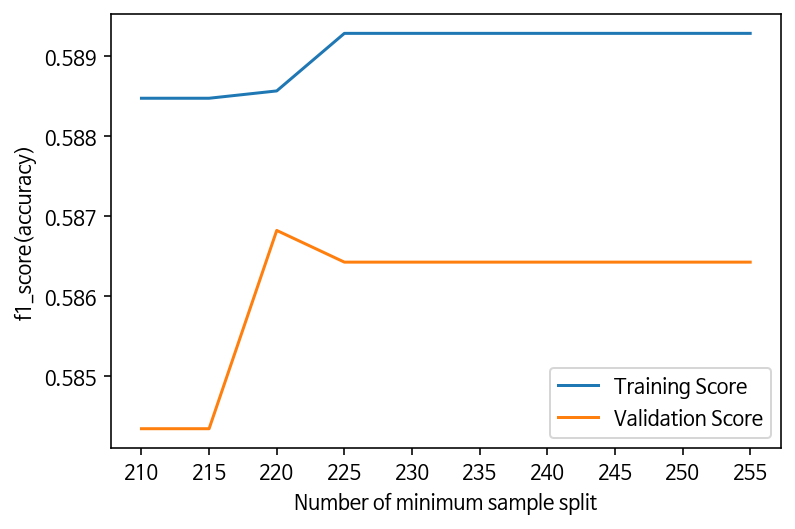

In [ ]:
xaxis = np.arange(210,260,5)
training = []
validation = []

for i in xaxis:
  print('for min_sample_split =',i)
  pipe = make_pipeline(
      OneHotEncoder(use_cat_names=True), 
      SimpleImputer(), 
      DecisionTreeClassifier(random_state=11, criterion='entropy',
                            min_samples_split= i, max_depth=8)
  )

  pipe.fit(X_train, y_train)
  y_pred_train = pipe.predict(X_train)
  y_pred_val = pipe.predict(X_val)

  print('훈련 정확도(f1_score):', f1_score(y_train, y_pred_train))
  print('검증 정확도(f1_score):', f1_score(y_val, y_pred_val))

  training.append(f1_score(y_train, y_pred_train))
  validation.append(f1_score(y_val, y_pred_val))

plt.plot(xaxis, training, label='Training Score')
plt.plot(xaxis, validation, label='Validation Score')
plt.title('')
plt.xticks(xaxis)
plt.xlabel('Number of minimum sample split')
plt.ylabel('f1_score(accuracy)')
plt.legend();